##### Импортрируем необходимые библиотеки

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from sklearn import tree
import numpy as np
import warnings
import os

In [2]:
os.getcwd()

'C:\\Users\\Mi'

##### Импорт данных

**This dataset is structured to predict the most suitable crop to grow based on several agro-climatic parameters**

In [3]:
df = pd.read_csv('C:\\Users\\Mi\\Downloads\\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Первичный аналих данных
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


(2200, 8)

In [5]:
# Анализ пропущенных значений
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# Баланс классов
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

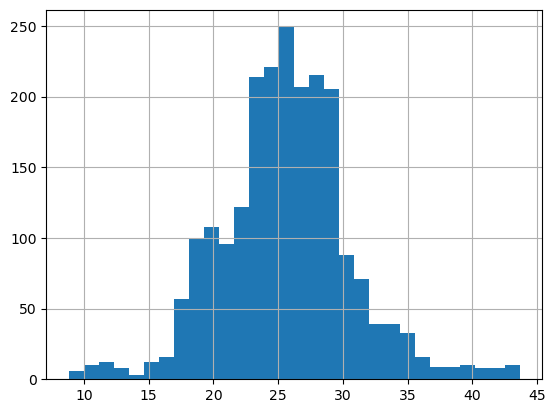

In [7]:
df['temperature'].hist(bins=30)

In [8]:
# Анализ дубликатов
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


##### Кодирование целевой переменной

In [9]:
y = df['label']
X = df.drop('label', axis=1)
print(y.shape, X.shape)

(2200,) (2200, 7)


In [10]:
# Кодирование зависимой переменной
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [11]:
# Метки классов
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


##### Разделение на обучающую и тестовую выборки

In [12]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(df.drop('label', axis=1)), df['label'], test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1760, 7) (440, 7) (1760,) (440,)


### Метод k-ближайших соседей

In [13]:
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Построение прогноза

In [14]:
# Обучающая выборка
y_pred_train = knn.predict(X_train)

# Тестовая выборка
y_pred_test = knn.predict(X_test)

##### Оценка точности модели

In [15]:
# Обучающая выборка
acc_train = accuracy_score(y_train, y_pred_train)

# Тестовая выборка
acc_test = accuracy_score(y_test, y_pred_test)

print({'ACC train': round(acc_train, 2),
      'ACC test': round(acc_test, 2)})

{'ACC train': 0.99, 'ACC test': 0.97}


##### Кросс-валидация

In [16]:
# Количество ближайших соседей
param_grid = {'n_neighbors': range(2, 11)}

In [17]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(2, 11)}, scoring='accuracy')

In [18]:
print("Лучшее число соседей:", grid_search.best_params_['n_neighbors'])
print("Лучшее качество (accuracy):", grid_search.best_score_)

Лучшее число соседей: 3
Лучшее качество (accuracy): 0.9806818181818182


### Логистическая регрессия

In [19]:
# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##### Построение прогноза

In [20]:
# Обучающая выборка
y_pred_train = model.predict(X_train)

# Тестовая выборка
y_pred_test = model.predict(X_test)

##### Оценка точности модели

In [21]:
# Обучающая выборка
acc_train = accuracy_score(y_train, y_pred_train)

# Тестовая выборка
acc_test = accuracy_score(y_test, y_pred_test)

print({'ACC train': round(acc_train, 2),
      'ACC test': round(acc_test, 2)})

{'ACC train': 0.98, 'ACC test': 0.96}


##### Кросс-валидация

In [22]:
param_grid = {'C': np.linspace(0.1, 10, 20)}

grid_search = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy') # cv - кол-во фолдов в кросс-валидации, scoring - метрика для оценки
grid_search.fit(X_train, y_train)

best_logreg = grid_search.best_estimator_
print("Лучшее значение C:", grid_search.best_params_['C'])

Лучшее значение C: 6.352631578947369


In [23]:
# Обучение модели
best_model = LogisticRegression(C = grid_search.best_params_['C'])
best_model.fit(X_train, y_train)

LogisticRegression(C=6.352631578947369)

##### Построение прогноза

In [24]:
# Обучающая выборка
y_pred_train = best_model.predict(X_train)

# Тестовая выборка
y_pred_test = best_model.predict(X_test)

##### Оценка точности модели

In [25]:
# Обучающая выборка
acc_train = accuracy_score(y_train, y_pred_train)

# Тестовая выборка
acc_test = accuracy_score(y_test, y_pred_test)

print({'ACC train': round(acc_train, 2),
      'ACC test': round(acc_test, 2)})

{'ACC train': 0.99, 'ACC test': 0.97}


##### Оценка важности признаков

**Важность признаков для логистической регрессии оценивается по абсолютным значениям коэффициентов модели**

In [26]:
coef = best_model.coef_[0]
feature_names = df.drop('label', axis=1).columns

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(coef)
})

feature_importance = feature_importance.sort_values(by='importance', ascending=False)

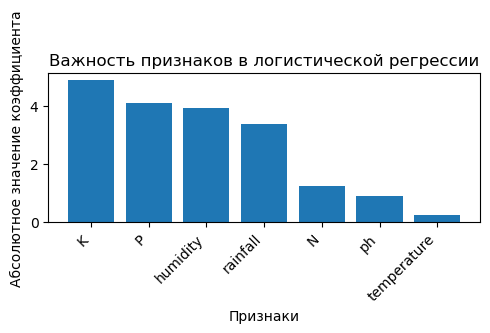

In [27]:
plt.figure(figsize=(5, 3))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation = 45, ha='right')
plt.xlabel('Признаки')
plt.ylabel('Абсолютное значение коэффициента')
plt.title('Важность признаков в логистической регрессии')
plt.tight_layout()
plt.show()

### Решающие деревья

In [28]:
dt = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

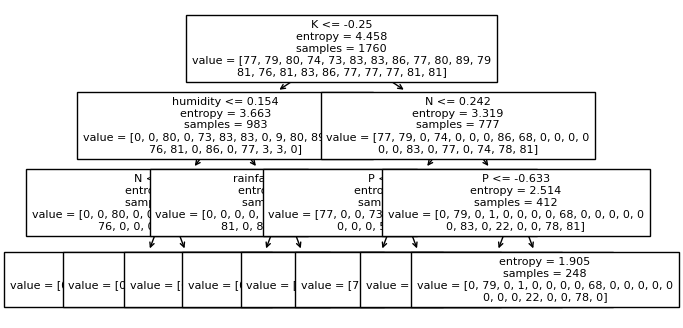

In [29]:
plt.figure(figsize=(6, 4))
tree.plot_tree(dt, feature_names = feature_names, fontsize = 8)
plt.show()

##### Построение прогноза

In [30]:
# Обучающая выборка
y_pred_train = dt.predict(X_train)

# Тестовая выборка
y_pred_test = dt.predict(X_test)

##### Оценка точности модели

In [31]:
# Обучающая выборка
acc_train = accuracy_score(y_train, y_pred_train)

# Тестовая выборка
acc_test = accuracy_score(y_test, y_pred_test)

print({'ACC train': round(acc_train, 2),
      'ACC test': round(acc_test, 2)})

{'ACC train': 0.38, 'ACC test': 0.3}


##### Кросс-валидация

In [32]:
hyperparameters = {'max_depth': range(0, 20)}

GSCV_dt = GridSearchCV(estimator  = dt,                
                       param_grid = hyperparameters,   
                       scoring    = "accuracy",        
                       cv         = 5)                 
GSCV_dt.fit(X_train, y_train)              
                                                       
hyperparameters_best = GSCV_dt.best_params_
hyperparameters_best

{'max_depth': 17}

In [33]:
dt_best = tree.DecisionTreeClassifier(max_depth = hyperparameters_best["max_depth"],
                                  criterion = 'entropy')
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17)

##### Построение прогноза

In [34]:
# Обучающая выборка
y_pred_train = dt_best.predict(X_train)

# Тестовая выборка
y_pred_test = dt_best.predict(X_test)

##### Оценка точности модели

In [35]:
# Обучающая выборка
acc_train = accuracy_score(y_train, y_pred_train)

# Тестовая выборка
acc_test = accuracy_score(y_test, y_pred_test)

print({'ACC train': round(acc_train, 2),
      'ACC test': round(acc_test, 2)})

{'ACC train': 1.0, 'ACC test': 0.98}


### Случайный лес

In [38]:
rf = RandomForestClassifier(max_depth    = 3,         
                            max_features = "sqrt",     
                                                       
                            max_samples  = 500,        
                            random_state = 42,        
                            criterion    = 'entropy')  
                                                       
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       max_samples=500, random_state=42)

##### Построение прогноза

In [39]:
# Обучающая выборка
y_pred_train = rf.predict(X_train)

# Тестовая выборка
y_pred_test = rf.predict(X_test)

##### Оценка качества модели

In [40]:
# Обучающая выборка
acc_train = accuracy_score(y_train, y_pred_train)

# Тестовая выборка
acc_test = accuracy_score(y_test, y_pred_test)

print({'ACC train': round(acc_train, 2),
      'ACC test': round(acc_test, 2)})

{'ACC train': 0.93, 'ACC test': 0.94}


##### Кросс-валидация

In [41]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': range(0, 20)
}

grid_search = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'max_depth': 17, 'n_estimators': 50}
Best CV score: 0.996590909090909


In [43]:
rf_best = RandomForestClassifier(max_depth    = 17,         
                            max_features = "sqrt",     
                            n_estimators = 50,                         
                            max_samples  = 500,        
                            random_state = 42,        
                            criterion    = 'entropy')  
                                                       
rf_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, max_features='sqrt',
                       max_samples=500, n_estimators=50, random_state=42)

##### Построение прогноза

In [44]:
# Обучающая выборка
y_pred_train = rf_best.predict(X_train)

# Тестовая выборка
y_pred_test = rf_best.predict(X_test)

##### Оценка качества модели

In [45]:
# Обучающая выборка
acc_train = accuracy_score(y_train, y_pred_train)

# Тестовая выборка
acc_test = accuracy_score(y_test, y_pred_test)

print({'ACC train': round(acc_train, 2),
      'ACC test': round(acc_test, 2)})

{'ACC train': 1.0, 'ACC test': 0.99}


### OOB

**Ошибка неотобранных элементов**

Для каждого наблюдения строится прогноз с использованием лишь тех моделей ансамбля, которые не использовали это наблюдение для обучения. Затем считается средняя ошибка прогноза этих наблюдений.

In [47]:
rf = RandomForestClassifier()

rf.oob_score = True                         
rf.fit(X_train, y_train)        
oob_rf = 1 - rf.oob_score_ 
oob_rf

0.005113636363636376

In [53]:
rf_2 = RandomForestClassifier()
rf_2.oob_score = True 
rf_2.max_features = 3                        
                                            
rf_2.fit(X_train, y_train)       
oob_rf_2 = 1 - rf_2.oob_score_ 
oob_rf_2

0.004545454545454519

In [57]:
rf_best = RandomForestClassifier(max_depth    = 17,
                            oob_score=True,      
                            max_features = "sqrt",     
                            n_estimators = 50,                         
                            max_samples  = 500,        
                            random_state = 42,        
                            criterion    = 'entropy')  
                                                       
rf_best.fit(X_train, y_train)
                                                                         
oob_rf_best = 1 - rf_best.oob_score_ 
oob_rf_best

0.009659090909090895